## Basic Stock Data Manipulation

https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/

Hello and welcome to part 3 of the Python for Finance tutorial series. In this tutorial, we're going to further break down some basic data manipulation and visualizations with our stock data. The starting code that we're going to be using (which was covered in the previous tutorial) is:

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

The [Pandas](https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/) module comes equipped with a bunch of built-in functionality that you can leverage, along with ways to [create custom Pandas functions](https://pythonprogramming.net/rolling-apply-mapping-functions-data-analysis-python-pandas-tutorial/). We'll cover some custom functions later, but, for now, let's do a very common operation to this data: Moving Averages.

The idea of a simple moving average is to take a window of time, and calculate the average price in that window. Then we shift that window over one period, and do it again. In our case, we'll do a 100 day rolling moving average. So this will take the current price, and the prices from the past 99 days, add them up, divide by 100, and there's your current 100-day moving average. Then we move the window over 1 day, and do the same thing again. Doing this in Pandas is as simple as:

In [2]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

Doing `df['100ma']` allows us to either re-define what comprises an existing column if we had one called `'100ma'` or create a new one, which is what we're doing here. We're saying that the `df['100ma']` column is equal to being the `df['Adj Close']` column with a rolling method applied to it, with a window of 100, and this window is going to be a mean() (average) operation.

Now, we could do:

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,NaN
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,NaN
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,NaN
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,NaN
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,NaN


What happened? Under the `100ma` column we just see `NaN`. We chose a 100 moving average, which theoretically requires 100 prior datapoints to compute, so we wont have any data here for the first 100 rows. `NaN` means "Not a Number." With Pandas, you can decide to do lots of things with missing data, but, for now, let's actually just change the minimum periods parameter:

In [4]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,14.620667
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,14.313334
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,14.237333
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,14.193833
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,14.163333


Alright, that worked, now we want to see it! But we've already seen simple graphs, how about something slightly more complex?

If you want to know more about subplot2grid, check out this [subplots with Matplotlib tutorial](https://pythonprogramming.net/subplot2grid-add_subplot-matplotlib-tutorial/).

Basically, we're saying we want to create two subplots, and both subplots are going to act like they're on a 6x1 grid, where we have 6 rows and 1 column. The first subplot starts at (0,0) on that grid, spans 5 rows, and spans 1 column. The next axis is also on a 6x1 grid, but it starts at (5,0), spans 1 row, and 1 column. The 2nd axis also has the sharex=ax1, which means that ax2 will always align its x axis with whatever ax1's is, and visa-versa. Now we just make our plots:

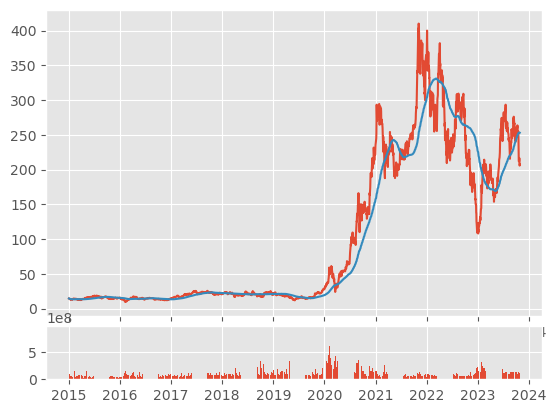

In [5]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

Full code up to this point:

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,14.620667
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,14.313334
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,14.237333
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,14.193833
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,14.163333


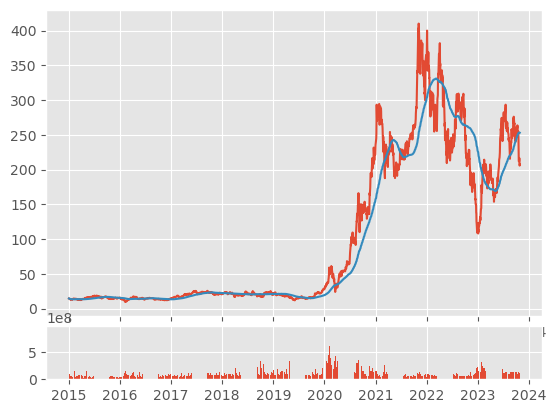

In [6]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from IPython.display import display
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
display(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In the next few tutorial, we'll learn how to make a candlestick graph via a Pandas resample of the data, and learn a bit more on working with Matplotlib.